In [1]:
# pip install dataframe_image

In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df
from scipy.stats import linregress


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [3]:
#removing the '.' in front of the county names
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')

# removing 'Georgia' from the counties
county21 = recent_census21.str.split(',').str[0]

#print(county21)

C:\Users\yhuan\AppData\Local\Temp/ipykernel_19768/1222772202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


In [4]:
# extracting 2020 and 2021 columns
data21 = recent_census[['2020','2021']]

#convert object to int
census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

#print(census_20)

In [5]:
#convert object to int
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

#print(census_21)

In [6]:
# create a cleaned up dataframe
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

#set index to county
census21_df= organized_21.set_index("County")

#print(census21_df)

In [7]:
#read csv file
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# extract Georgia's data from national data
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
#print(file_2_ga)

In [8]:
#extract the population data of interest
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]

#rename columns
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})

#set index to county
ga_census_20 = ga_census_estimate_population.set_index("County")

#print(ga_census_20)

In [9]:
#merge csv files 

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')

#label column names
column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

#reindex

merge_census = merge_census_raw.reindex(columns=column_names)

#print(merge_census)

In [10]:
# select 10 random counties
samples_df = merge_census.sample(10)

#export randomly selected counties table
samples_df.dfi.export('plots_tables/sample_counties.png')

samples_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Ben Hill County,17649,17595,17608,17461,17462,17368,17267,17059,16794,16711,17153,17158
Colquitt County,45638,45778,46029,46139,45880,45486,45471,45501,45467,45569,45866,45812
Lumpkin County,30281,30453,30684,30872,31122,31292,31422,32812,32934,33692,33596,34278
Hancock County,9433,9394,9078,8952,8571,8579,8644,8545,8344,8475,8722,8630
Jones County,28628,28724,28610,28563,28641,28432,28572,28459,28603,28689,28356,28400
Terrell County,9525,9390,9225,9167,9081,9016,8873,8698,8601,8573,9153,8964
Fayette County,106938,107171,107343,108103,109259,110215,111294,112626,113333,114645,119441,120574
Greene County,15977,16049,16116,16241,16418,16620,16892,17225,17730,18356,19025,19536
Haralson County,28763,28474,28325,28357,28513,28733,28860,29286,29626,29884,29985,30572


In [11]:
#Transpose index and column
samples_df.T

County,Ben Hill County,Colquitt County,Lumpkin County,Hancock County,Jones County,Terrell County,Fayette County,Greene County,Haralson County,Habersham County
2010,17649,45638,30281,9433,28628,9525,106938,15977,28763,43058
2011,17595,45778,30453,9394,28724,9390,107171,16049,28474,43041
2012,17608,46029,30684,9078,28610,9225,107343,16116,28325,43373
2013,17461,46139,30872,8952,28563,9167,108103,16241,28357,43146
2014,17462,45880,31122,8571,28641,9081,109259,16418,28513,43553
2015,17368,45486,31292,8579,28432,9016,110215,16620,28733,43775
2016,17267,45471,31422,8644,28572,8873,111294,16892,28860,44166
2017,17059,45501,32812,8545,28459,8698,112626,17225,29286,44687
2018,16794,45467,32934,8344,28603,8601,113333,17730,29626,45580
2019,16711,45569,33692,8475,28689,8573,114645,18356,29884,45542


In [12]:
#collect statistics for 19, 20, 21
sample_19= samples_df['2019'].describe()
sample_20 = samples_df['2020'].describe()
sample_21 = samples_df['2020'].describe()

#create new df
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

#export
sample_stat.dfi.export('plots_tables/sample_stat.png')

sample_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,35013.600000,35740.200000,35740.200000
std,30997.037408,32265.866735,32265.866735
min,8475.000000,8722.000000,8722.000000
25%,17122.250000,17621.000000,17621.000000
50%,29286.500000,29170.500000,29170.500000
75%,42579.500000,42798.500000,42798.500000
max,114645.000000,119441.000000,119441.000000


In [13]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
stat_years =[]

# for loop
for each in years:

    samples_df_data = samples_df[each]
    
    stat_years.append(samples_df_data)
        
# zip into dictionary
year_zip = dict(zip(years, stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 17122.25
The upper quartile of 2019 is: 42579.5
The interquartile range of 2019 is: 25457.25
Values below -21063.625 could be 2019 outliers.
Values above 80765.375 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 17621.0
The upper quartile of 2020 is: 42798.5
The interquartile range of 2020 is: 25177.5
Values below -20145.25 could be 2020 outliers.
Values above 80564.75 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 17752.5
The upper quartile of 2021 is: 42928.5
The interquartile range of 2021 is: 25176.0
Values below -20011.5 could be 2021 outliers.
Values above 80692.5 could be 2021 outliers.
--------------------


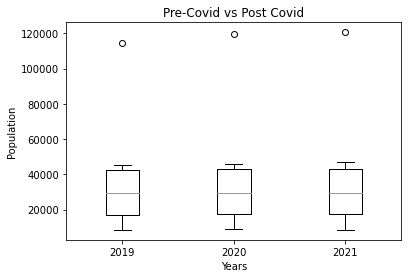

In [14]:
plt.boxplot(stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("Population")
plt.title("Pre-Covid vs Post Covid")
plt.savefig('plots_tables/precovidpostcovid.png')
plt.show()

In [15]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
# multiply by 100 for percent
per_samp_change= clean_samp_change*100

#export percent change table
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Ben Hill County,-0.305966,0.073885,-0.834848,0.005727,-0.538312,-0.581529,-1.204610,-1.553432,-0.494224,2.644964,0.029149
Colquitt County,0.306762,0.548298,0.238980,-0.561347,-0.858762,-0.032977,0.065976,-0.074724,0.224339,0.651759,-0.117734
Lumpkin County,0.568013,0.758546,0.612697,0.809795,0.546237,0.415442,4.423652,0.371815,2.301573,-0.284934,2.030004
Hancock County,-0.413442,-3.363849,-1.387971,-4.256032,0.093338,0.757664,-1.145303,-2.352253,1.569990,2.914454,-1.054804
Jones County,0.335336,-0.396881,-0.164278,0.273081,-0.729723,0.492403,-0.395492,0.505991,0.300668,-1.160724,0.155170
Terrell County,-1.417323,-1.757188,-0.628726,-0.938148,-0.715780,-1.586069,-1.972275,-1.115199,-0.325544,6.765426,-2.064897
Fayette County,0.217883,0.160491,0.708011,1.069351,0.874985,0.978996,1.196830,0.627741,1.157650,4.183349,0.948585
Greene County,0.450648,0.417471,0.775627,1.089834,1.230357,1.636582,1.971347,2.931785,3.530739,3.644585,2.685940
Haralson County,-1.004763,-0.523284,0.112974,0.550129,0.771578,0.442000,1.476091,1.160964,0.870857,0.337973,1.957645


In [16]:
#collect statistics for 19, 20, 21
per_samp_19= per_samp_change['2019'].describe()
per_samp_20= per_samp_change['2020'].describe()
per_samp_21= per_samp_change['2021'].describe()

#create new df
per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,0.905268,2.093307,0.905268
std,1.274955,2.397236,1.274955
min,-0.494224,-1.160724,-0.494224
25%,-0.006443,0.416420,-0.006443
50%,0.585762,1.940593,0.585762
75%,1.466905,3.462052,1.466905
max,3.530739,6.765426,3.530739


In [17]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
per_stat_years =[]

# for loop
for each in years:

    per_samples_df_data = per_samp_change[each]
    
    per_stat_years.append(per_samples_df_data)
        
# zip into dictionary
per_year_zip = dict(zip(years, per_stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = per_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: -0.006442791498298406
The upper quartile of 2019 is: 1.4669054251236713
The interquartile range of 2019 is: 1.4733482166219698
Values below -2.216465116431253 could be 2019 outliers.
Values above 3.6769277500566258 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 0.4164198409334241
The upper quartile of 2020 is: 3.4620522269811493
The interquartile range of 2020 is: 3.0456323860477252
Values below -4.1520287381381635 could be 2020 outliers.
Values above 8.030500806052737 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: -0.08101334706345775
The upper quartile of 2021 is: 1.8309930369153793
The interquartile range of 2021 is: 1.912006383978837
Values below -2.9490229230317135 could be 2021 outliers.
Values above 4.699002612883635 could be 2021 outliers.
--------------------


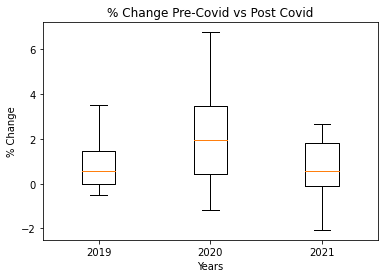

In [18]:
plt.boxplot(per_stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("% Change")
plt.title("% Change Pre-Covid vs Post Covid")
plt.savefig('plots_tables/per_precovidpostcovid.png')
plt.show()

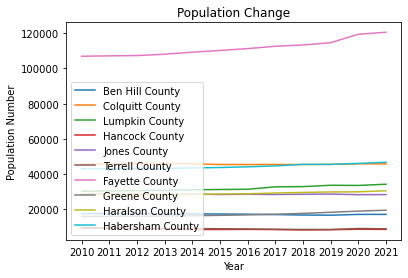

In [19]:
# plot sampled counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

#save figure 
plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

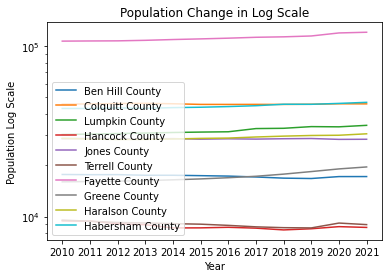

In [20]:
#plot sampled counties in log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


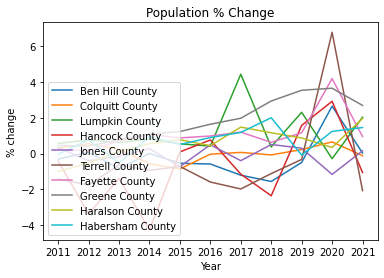

In [21]:
#plot percent change
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

The 10 counties are randomized when the kernal is restarted, but the counties that were selected are hard coded. These following counties are hard coded in reference to the initial merged dataframe.

In [22]:
#recreate original data frame that was used for all the plots 

paulding = merge_census.loc['Paulding County',:]
worth = merge_census.loc['Worth County',:]
grady = merge_census.loc['Grady County',:]
laurens = merge_census.loc['Laurens County',:]
barrow = merge_census.loc['Barrow County',:]
newton = merge_census.loc['Newton County',:]
pike = merge_census.loc['Pike County',:]
chatham = merge_census.loc['Chatham County',:]
fulton = merge_census.loc['Fulton County',:]
dodge = merge_census.loc['Dodge County',:]

ppt_counties = pd.DataFrame({"Paulding County":paulding, "Worth County": worth,
                             "Grady County": grady, "Laurens County": laurens,
                             "Barrow County": barrow, "Newton County": newton,
                             "Pike County": pike, "Chatham County": chatham,
                             "Fulton County": fulton, "Dodge County": dodge
                            })
#transpose index and columns
ppt_counties.T

#rename df
sample_counties = ppt_counties.T

sample_counties

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Paulding County,142826,143606,144750,146775,148562,151691,155415,159642,164482,169302,169660,173780
Worth County,21692,21516,21356,21058,21010,20692,20732,20532,20307,20185,20719,20554
Grady County,25027,25103,25283,25120,25236,25106,24895,24762,24730,24588,26221,25918
Laurens County,48388,47841,47819,47727,47553,47491,47287,47362,47293,47567,49497,49547
Barrow County,69670,69835,70128,71233,72843,74979,77108,79086,81105,83581,83963,86658
Newton County,100128,100446,100965,102060,103470,104920,106529,107903,109556,111894,112780,115355
Pike County,17929,17792,17780,17784,17774,17935,17916,18213,18622,18953,18935,19477
Chatham County,265799,271665,276243,277790,282396,286239,289055,289771,289771,290185,294904,296329
Fulton County,925622,947582,973464,981844,992321,1005752,1023816,1039996,1051516,1065019,1069023,1065334
Dodge County,21756,21606,21511,21424,21167,21133,20866,20777,20858,20672,19849,19759


In [23]:
#collect statistics for 19, 20, 21
sample_counties_19 = round(sample_counties['2019'].describe(),0)
sample_counties_20 = round(sample_counties['2020'].describe(),0)
sample_counties_21 = round(sample_counties['2020'].describe(),0)

#create new df
sample_counties_stat = pd.DataFrame({'2019': sample_counties_19, '2020': sample_counties_20, '2021': sample_counties_21})

#export
sample_counties_stat.dfi.export('plots_tables/sample_counties_stat.png')

sample_counties_stat

,2019,2020,2021
count,10.0,10.0,10.0
mean,185195.0,186555.0,186555.0
std,321063.0,322253.0,322253.0
min,18953.0,18935.0,18935.0
25%,21651.0,22094.0,22094.0
50%,65574.0,66730.0,66730.0
75%,154950.0,155440.0,155440.0
max,1065019.0,1069023.0,1069023.0


In [24]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
ppt_years =[]

# for loop
for each in years:

    ppt_samples = sample_counties[each]
    
    ppt_years.append(ppt_samples)
        
# zip into dictionary
ppt_year_zip = dict(zip(years, ppt_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in ppt_year_zip:
    quartiles = ppt_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 21651.0
The upper quartile of 2019 is: 154950.0
The interquartile range of 2019 is: 133299.0
Values below -178297.5 could be 2019 outliers.
Values above 354898.5 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 22094.5
The upper quartile of 2020 is: 155440.0
The interquartile range of 2020 is: 133345.5
Values below -177923.75 could be 2020 outliers.
Values above 355458.25 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 21895.0
The upper quartile of 2021 is: 159173.75
The interquartile range of 2021 is: 137278.75
Values below -184023.125 could be 2021 outliers.
Values above 365091.875 could be 2021 outliers.
--------------------


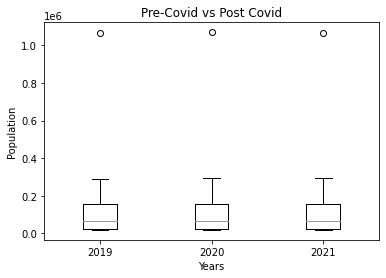

In [25]:
plt.boxplot(ppt_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("Population")
plt.title("Pre-Covid vs Post Covid")
plt.savefig('plots_tables/pptcovidpostcovid.png')
plt.show()

In [26]:
#percent change
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

#drop 2010 
samp_change = samp_change.drop(columns=['2010'])
#multiply by 100 for percent
per_samp_change= samp_change*100

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Paulding County,0.546119,0.796624,1.398964,1.217510,2.106191,2.454991,2.719815,3.031784,2.930412,0.211456,2.428386
Worth County,-0.811359,-0.743633,-1.395392,-0.227942,-1.513565,0.193311,-0.964692,-1.095850,-0.600778,2.645529,-0.796370
Grady County,0.303672,0.717046,-0.644702,0.461783,-0.515137,-0.840437,-0.534244,-0.129230,-0.574201,6.641451,-1.155562
Laurens County,-1.130446,-0.045986,-0.192392,-0.364574,-0.130381,-0.429555,0.158606,-0.145686,0.579367,4.057435,0.101016
Barrow County,0.236831,0.419560,1.575690,2.260188,2.932334,2.839462,2.565233,2.552917,3.052833,0.457042,3.209747
Newton County,0.317593,0.516696,1.084534,1.381540,1.401372,1.533549,1.289790,1.531931,2.134068,0.791821,2.283206
Pike County,-0.764125,-0.067446,0.022497,-0.056230,0.905817,-0.105938,1.657736,2.245649,1.777468,-0.094972,2.862424
Chatham County,2.206931,1.685164,0.560014,1.658087,1.360855,0.983793,0.247704,0.000000,0.142871,1.626204,0.483208
Fulton County,2.372459,2.731373,0.860843,1.067074,1.353493,1.796069,1.580362,1.107697,1.284146,0.375956,-0.345081
Dodge County,-0.689465,-0.439693,-0.404444,-1.199589,-0.160627,-1.263427,-0.426531,0.389854,-0.891744,-3.981231,-0.453423


In [27]:
#collect statistics for 19, 20, 21
per_sample_counties_19 = round(per_samp_change['2019'].describe(),3)
per_sample_counties_20 = round(per_samp_change['2020'].describe(),3)
per_sample_counties_21 = round(per_samp_change['2020'].describe(),3)

#create new df
per_sample_counties_stat = pd.DataFrame({'2019': per_sample_counties_19, '2020': per_sample_counties_20, '2021': per_sample_counties_21})

#export
per_sample_counties_stat.dfi.export('plots_tables/per_sample_counties_stat.png')

per_sample_counties_stat

,2019,2020,2021
count,10.000,10.000,10.000
mean,0.983,1.273,1.273
std,1.470,2.807,2.807
min,-0.892,-3.981,-3.981
25%,-0.395,0.253,0.253
50%,0.932,0.624,0.624
75%,2.045,2.391,2.391
max,3.053,6.641,6.641


In [28]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
per_ppt_years =[]

# for loop
for each in years:

    per_ppt_samples = per_samp_change[each]
    
    per_ppt_years.append(per_ppt_samples)
        
# zip into dictionary
per_ppt_year_zip = dict(zip(years, per_ppt_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in per_ppt_year_zip:
    quartiles = per_ppt_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: -0.3949331711709858
The upper quartile of 2019 is: 2.0449181941082193
The interquartile range of 2019 is: 2.439851365279205
Values below -4.0547102190897935 could be 2019 outliers.
Values above 5.704695242027027 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 0.2525812714830544
The upper quartile of 2020 is: 2.3906976368790356
The interquartile range of 2020 is: 2.138116365395981
Values below -2.9545932766109173 could be 2020 outliers.
Values above 5.597872184973007 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: -0.4263378705791354
The upper quartile of 2021 is: 2.392091198660112
The interquartile range of 2021 is: 2.8184290692392473
Values below -4.653981474438006 could be 2021 outliers.
Values above 6.619734802518983 could be 2021 outliers.
--------------------


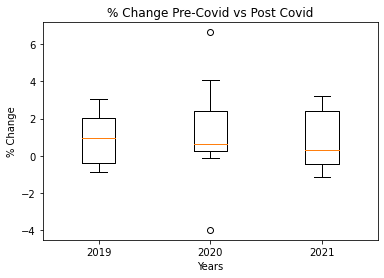

In [29]:
plt.boxplot(per_ppt_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("% Change")
plt.title("% Change Pre-Covid vs Post Covid")
plt.savefig('plots_tables/perpptcovidpostcovid.png')
plt.show()

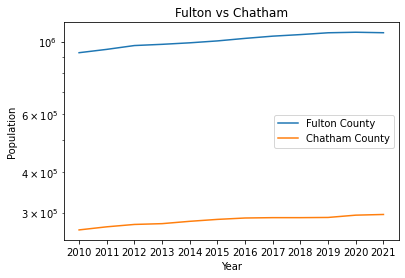

In [30]:
#compare the population change between Fulton and Chatham 
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

#save figure
plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

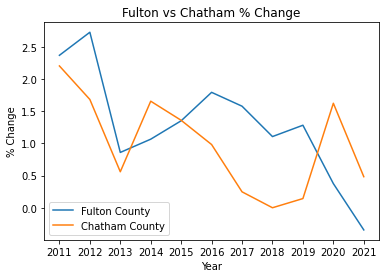

In [31]:
#compare % change between Fulton and Chatham
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

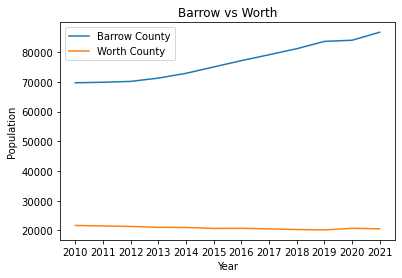

In [32]:
#compare population change between Barrow and County 
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

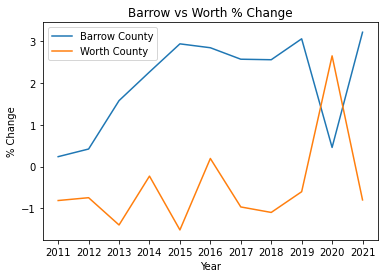

In [33]:
#compare % change between Barrow and Worth
plt.plot(per_samp_change.T['Barrow County'], label='Barrow County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

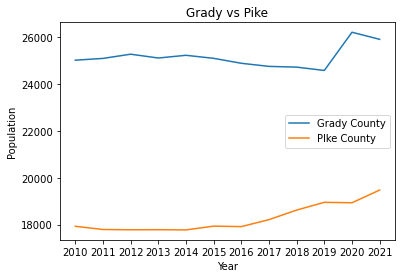

In [34]:
#compare the population change between Grady and Pike 
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

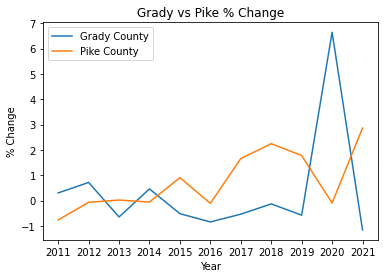

In [35]:
#compare % change between Grady and Pike
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [36]:
# setting the x and y axis 
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

The r-squared is: 0.9674131773839155


<function matplotlib.pyplot.show(close=None, block=None)>

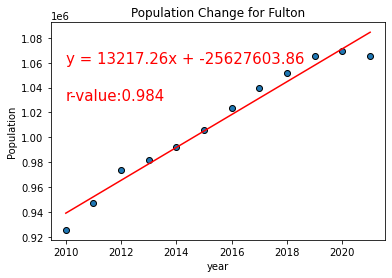

In [37]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(fulton_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [38]:
# setting the x and y axis 
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

The r-squared is: 0.5665640906797728


<function matplotlib.pyplot.show(close=None, block=None)>

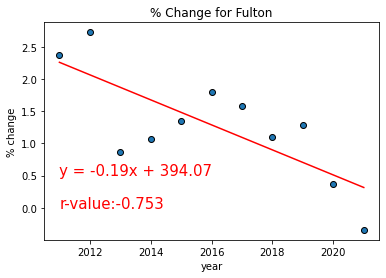

In [39]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [40]:
# setting the x and y axis 
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

The r-squared is: 0.9337720205022068


<function matplotlib.pyplot.show(close=None, block=None)>

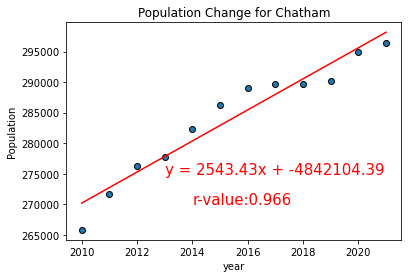

In [41]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [42]:
# setting the x and y axis 
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

The r-squared is: 0.3403660066509065


<function matplotlib.pyplot.show(close=None, block=None)>

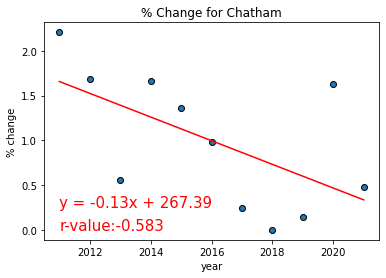

In [43]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [44]:
# setting the x and y axis 
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

The r-squared is: 0.09159820413588947


<function matplotlib.pyplot.show(close=None, block=None)>

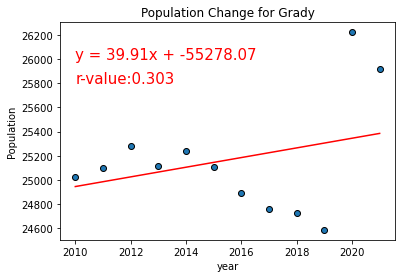

In [45]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [46]:
# setting the x and y axis 
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

The r-squared is: 0.04592530592906027


<function matplotlib.pyplot.show(close=None, block=None)>

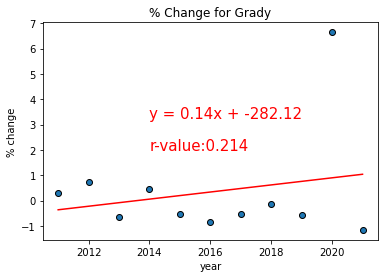

In [47]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [48]:
# setting the x and y axis 
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

The r-squared is: 0.7764997093787491


<function matplotlib.pyplot.show(close=None, block=None)>

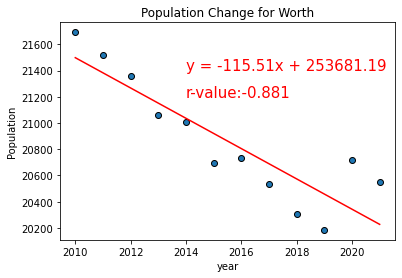

In [49]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [50]:
# setting the x and y axis 
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

The r-squared is: 0.15259008460634854


<function matplotlib.pyplot.show(close=None, block=None)>

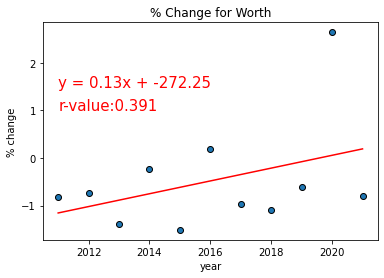

In [51]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show